<a href="https://colab.research.google.com/github/quantum-intelligence/computational-physics/blob/main/Solutions_of_CP_Lecture11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Physics
### Lecture 11
PDEs, Heat equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

## Simulate the heatflow out of a tall cup of coffee 
(take the approximation of a long insulated cylinder) 
- T=100C along the rod at t=0 
- both ends with T=0C at t=0

QUESTION:
- Inspect the function below and modify so that it's 'fixed'
- Comment in a text box the role of the following:
  - Dx, Dt
  - T
  - Tpl
  - Nx, Nt
  - m

In [2]:
Nx = 101; Nt = 9000;
Dx = 0.03
Dt = 0.9
kappa = 210; sph= 900; rho = 2700 #conductivity, specific heat, density
T = np.zeros((Nx,2))
Tpl = np.zeros((Nx,31))

for ix in range(1,Nx-1):
  T[ix,0] = 100
T[0,0] = 0; T[0,1] = 0
T[Nx-1,0] = 0; T[Nx-1,1] = 0
eta = kappa/(sph*rho)*Dt/(Dx**2)
m = 1

for t in range(1,Nt):
  for ix in range(1, Nx-1):
    T[ix,1] = T[ix,0] + eta*(T[ix+1,0] + T[ix-1,0] - 2*T[ix,0])
  if t%300 == 0 or t== 1:
    for ix in range(1, Nx -1, 2):
      Tpl[ix, m] = T[ix, 1]
    #print(m)
    m = m+1
  for ix in range(1, Nx-1):
    T[ix, 0] = T[ix, 1]
x = list(range(1,Nx-1,2))
y = list(range(1,30))
X, Y = np.meshgrid(x,y)
def fZ(Tpl):
  z = Tpl[X,Y]
  return z
Z = fZ(Tpl)

Write your comments that explain the script here:

- extend Nt to more time steps: Nt = 9000;


----------


3D rendering of Temperature as a function of x, t:

In [3]:
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y)])
fig.update_layout(title='Heat Map (x,t)', autosize=False,
                  width=500, height=500,  
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

QUESTION
- Create a contor plot that indicates the isotherms.
- Examine the stability of your algorithm by varying Dt and Dx.
- Study the stability as a function of $\eta$ (von Neumann analysis)

(Hint: create a function using the above script that takes as the input Dt and Dx)

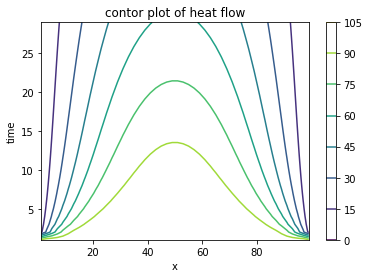

In [4]:
#Contor plot
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('time')
ax.set_title("contor plot of heat flow")
fig.colorbar(CS)
plt.show()

In [5]:
# stability 

#define function to calculate heatflow
def heatflow(Dx, Dt):
  Nx = 101; Nt = 9000;
  kappa = 210; sph= 900; rho = 2700 #conductivity, specific heat, density
  T = np.zeros((Nx,2))
  Tpl = np.zeros((Nx,31))

  for ix in range(1,Nx-1):
    T[ix,0] = 100
  T[0,0] = 0; T[0,1] = 0
  T[Nx-1,0] = 0; T[Nx-1,1] = 0
  eta = kappa/(sph*rho)*Dt/(Dx**2)
  m = 1

  for t in range(1,Nt):
    for ix in range(1, Nx-1):
      T[ix,1] = T[ix,0] + eta*(T[ix+1,0] + T[ix-1,0] - 2*T[ix,0])
    if t%300 == 0 or t== 1:
      for ix in range(1, Nx -1, 2):
        Tpl[ix, m] = T[ix, 1]
      #print(m)
      m = m+1
    for ix in range(1, Nx-1):
      T[ix, 0] = T[ix, 1]
  x = list(range(1,Nx-1,2))
  y = list(range(1,30))
  X, Y = np.meshgrid(x,y)
  def fZ(Tpl):
    z = Tpl[X,Y]
    return z
  Z = fZ(Tpl)
  return X,Y,Z


In [59]:
#examine different Dx and Dt and check the numerical solution...

Dx = 0.03
Dt = 0.9
X1,Y1,Z1 = heatflow(Dx, Dt)

Dx = 0.026
Dt = 1.9
X2,Y2,Z2 = heatflow(Dx, Dt)

Dx = 0.029
Dt = 5.0
X3,Y3,Z3 = heatflow(Dx, Dt)

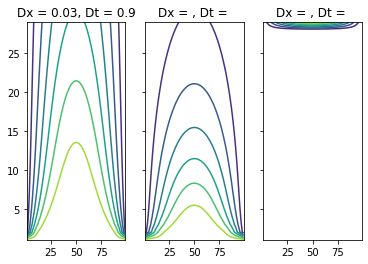

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
ax1.contour(X1, Y1, Z1)
ax1.set_title('Dx = 0.03, Dt = 0.9')
ax2.contour(X2, Y2, Z2)
ax2.set_title('Dx = , Dt = ')
ax3.contour(X3, Y3, Z3)
ax3.set_title('Dx = , Dt = ')
plt.show()

Calculate $\eta$ for the Dx and Dt above
$\eta$ = $\frac{K \Delta t}{C \rho \Delta x^2}$ < $\frac{1}{4}$ 

In [61]:
Dx = 0.03
Dt = 0.9
eta = (kappa/sph/rho)*Dt/(Dx**2)
print('Dx',Dx, 'Dt',Dt,'eta', eta)

Dx = 0.026
Dt = 1.9
eta = (kappa/sph/rho)*Dt/(Dx**2)
print('Dx',Dx, 'Dt',Dt,'eta', eta)

Dx = 0.029
Dt = 5.0
eta = (kappa/sph/rho)*Dt/(Dx**2)
print('Dx',Dx, 'Dt',Dt,'eta', eta)

Dx 0.03 Dt 0.9 eta 0.08641975308641976
Dx 0.026 Dt 1.9 eta 0.2428957557162685
Dx 0.029 Dt 5.0 eta 0.5137916354721744


BONUS QUESTION:
You like your coffee very hot. But just after you've made your afternoon coffee, there is knock on the door that you need to answer. In order to make sure the coffee is as hot as possible when you return, do you add your cold milk before going to answer the door or after? Think about how to answer this question using your simulations.

In [ ]:
#type your code / rsponse here